# Analyzing a Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using SurveyMonkey. They received 835 total responses, which are downloadable from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The goal of this project will be conduct a rapid cleaning, exploration and analysis of the data.

### Summary of Results

After analyzing the data, we reached to the conclusion that the 5th movie, Star Wars: Episode V The Empire Strikes Back ranked the highest within the respondents. It also happened to be the most viewed among the respondents, which could explain why it was the highest ranked. Furthermore, we noticed that within subgroups of respondents, including males, females, Star Wars fans, Star Trek fans, Star Wars-only fans and Star Trek-only fans, these results were the same.

## Reading and Exploring the Dataset

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Exploring dataframe
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

Upon exploring, we first notice that `RespondentID` is missing from the first row. We'll need to remove any rows with an invalid `RespondentID`. The dataset also contains 38 columns. We therefore need to explore all columns in order to determine how we can proceed to clean our dataset.

In [2]:
# Removing invalid RespondentIDs
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

# Exploring modified dataframe
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
# Exploring column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

When looking at the first two questions, which are:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

We notice that they represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. There are other columns that represent similar types of questions. 

## Cleaning and Mapping Yes/No Columns

We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the `pandas.Series.map()` method to perform the conversion.

In [4]:
# Creating list of columns to modify
bool_cols = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?", "Are you familiar with the Expanded Universe?", "Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦", "Do you consider yourself to be a fan of the Star Trek franchise?"]

# Creating mapping dictionary
bool_dict = {
    "Yes": True,
    "No": False
}

# Creating for loop to map dictionary
for cols in bool_cols:
    star_wars[cols] = star_wars[cols].map(bool_dict)
    
# Exploring modifications
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The modifications seem to have worked. We can move on to the next column types.

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

## Cleaning and Mapping Checkbox Columns

The columns for this question seem to appear this way:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [5]:
# Creating mapping dict
bool_dict_movie = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

# Creating for loop to map dictionary
for cols in star_wars.columns[3:9]:
    star_wars[cols] = star_wars[cols].map(bool_dict_movie)
    
# Exploring modifications
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In order to move on, we'll need to rename these columns to better reflect what they represent. In order to make the names more intuitive, we can use seen_1 to indicate whether the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.

In [6]:
# Renaming columns
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

# Exploring modifications
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

Moving on, the next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: Episode I The Phantom Menace
- `Unnamed: 10` - How much the respondent liked Star Wars: Episode II Attack of the Clones
- `Unnamed: 11` - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- `Unnamed: 12` - How much the respondent liked Star Wars: Episode IV A New Hope
- `Unnamed: 13` - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- `Unnamed: 14` - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [7]:
# Converting to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Renaming columns
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "rank_1",
    "Unnamed: 10": "rank_2",
    "Unnamed: 11": "rank_3",
    "Unnamed: 12": "rank_4",
    "Unnamed: 13": "rank_5",
    "Unnamed: 14": "rank_6",
})

# Exploring modifications
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now that we have the essential columns cleaned up, we can start analyzing our data. We can start by finding the highest ranked movie first.

## Finding the Highest Ranked Movie

To do this, we can compute the mean of each of the ranking columns.

In [8]:
# Computing mean
rank_mean = star_wars[star_wars.columns[9:15]].mean() # Selecting ranking columns

rank_mean

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

We can create a bar chart to visualize these rankings.

<BarContainer object of 6 artists>

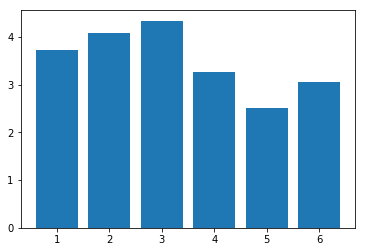

In [9]:
# Enabling matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Creating bar chart
plt.bar(x=range(1,7), height=rank_mean)

We notice that the 5th movie, Star Wars: Episode V The Empire Strikes Back ranked the highest within this group of respondents (mean closest to 1). Out of all the movies, the lowest ranked was Star Wars: Episode III Revenge of the Sith.

Next, we can explore the number of views for each movies within this group of respondents.

## Finding the Most Viewed Movie

Since boolean values are treated like integers 1 and 0, we can figure out how many people have seen each movie just by taking the sum of the `seen` columns.

In [10]:
# Calculating the sum of the seen columns
seen_sum = star_wars[star_wars.columns[3:9]].sum()

seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

We can create a bar chart to visualize the number of views.

<BarContainer object of 6 artists>

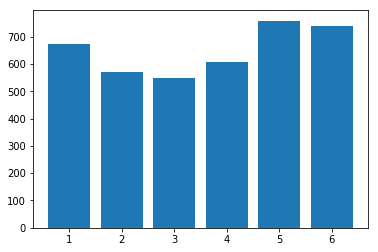

In [11]:
# Creating bar chart
plt.bar(x=range(1,7), height=seen_sum)

It seems as though the 5th movie, Star Wars: Episode V The Empire Strikes Back was the most viewed, whereas Star Wars: Episode III Revenge of the Sith was the least viewed. This finding partially explains our previous finding since people have a higher chance of highly ranking a movie that they have watched as opposed to a movie they haven't watched.

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups.

## Exploring the Data by Binary Segments

Here are a few examples:

- `Gender` - `Male` or `Female`
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

We can redo the analyses above by splitting the respondents into all the subsets above.

## Finding the Highest Ranked Movie Among Gender Groups

In order to contextualize the following analysis, we can start off by exploring the number of respondents in each subgroup.

In [12]:
# Calculating number of respondents in each subgroup
star_wars["Gender"].value_counts(dropna=False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

There were slightly more female than males respondents. We can now separate male and female respondents.

In [13]:
# Setting males and females in separate dataframe
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

We can now explore the ranking of movies among both groups.

In [14]:
# Calculating male rankings
males_ranking = males[males.columns[9:15]].mean()

# Exploring male rankings
males_ranking

rank_1    4.037825
rank_2    4.224586
rank_3    4.274882
rank_4    2.997636
rank_5    2.458629
rank_6    3.002364
dtype: float64

In [15]:
# Calculating female rankings
females_ranking = females[females.columns[9:15]].mean()

# Exploring female rankings
females_ranking

rank_1    3.429293
rank_2    3.954660
rank_3    4.418136
rank_4    3.544081
rank_5    2.569270
rank_6    3.078086
dtype: float64

We can now create visualizations.

<BarContainer object of 6 artists>

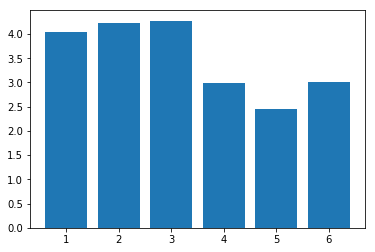

In [16]:
# Creating barplot of male rankings
plt.bar(range(1,7), males_ranking)

<BarContainer object of 6 artists>

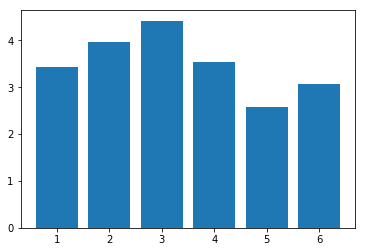

In [17]:
# Creating barplot of female rankings
plt.bar(range(1,7), females_ranking)

Among both groups, it appears that the 5th movie is the highest ranked. We can now check which movie was more viewed by each of these groups.

## Finding the Most Viewed Movie Among Gender Groups

In [18]:
# Calculating male views
males_seen = males[males.columns[3:9]].sum()

males_seen

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [19]:
# Calculating female views
females_seen = females[females.columns[3:9]].sum()

females_seen

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

We can now create a visualization.

<BarContainer object of 6 artists>

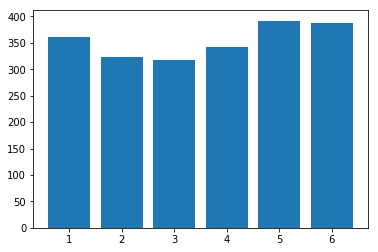

In [20]:
# Creating barplot for male views
plt.bar(range(1,7), males_seen)

<BarContainer object of 6 artists>

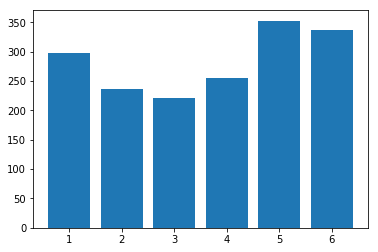

In [21]:
# Creating barplot for female views
plt.bar(range(1,7), females_seen)

For both gender groups, the 5th movie seems to be the most viewed. This, again, could explain why it was the highest ranked among both groups.

Next, we can explore whether Star Wars fans have different opinions compared to non-Star Wars fans.

## Finding the Highest Ranked Movie Among Fans and Non-Fans

In order to contextualize the following analysis, we can start off by exploring the number of respondents in each subgroup.

In [22]:
# Calculating number of respondents in each subgroup
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

About half of the total respondents were Star Wars fans, and less than a quarter of the total respondents were not Star Wars fans. We can now separate fans and non-fans.

In [23]:
# Setting fans and non-fans in separate dataframe
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

In [24]:
# Calculating fan rankings
fans_ranking = fans[fans.columns[9:15]].mean()

# Exploring fan rankings
fans_ranking

rank_1    4.141304
rank_2    4.342391
rank_3    4.417423
rank_4    2.932971
rank_5    2.333333
rank_6    2.829710
dtype: float64

In [25]:
# Calculating non-fan rankings
non_fans_ranking = non_fans[non_fans.columns[9:15]].mean()

# Exploring non-fan rankings
non_fans_ranking

rank_1    2.936396
rank_2    3.591549
rank_3    4.193662
rank_4    3.933099
rank_5    2.862676
rank_6    3.471831
dtype: float64

We can now create visualizations.

<BarContainer object of 6 artists>

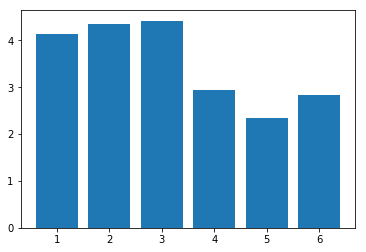

In [26]:
# Creating barplot of male rankings
plt.bar(range(1,7), fans_ranking)

<BarContainer object of 6 artists>

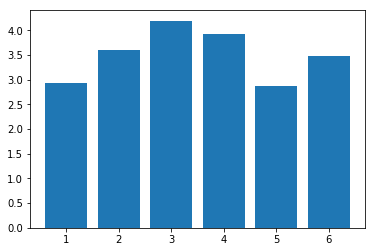

In [27]:
# Creating barplot of female rankings
plt.bar(range(1,7), non_fans_ranking)

The results are similar to the ones found previously–the 5th movie is still the most popular among both groups, however many of the non-fans seem to have also ranked the 1st movie as the best of all. We can now check which movie was more viewed by each of these groups.

## Finding the Most Viewed Movie Among Fans and Non-Fans

In [28]:
# Calculating fan views
fans_seen = fans[fans.columns[3:9]].sum()

fans_seen

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64

In [29]:
# Calculating non-fan views
non_fans_seen = non_fans[non_fans.columns[3:9]].sum()

non_fans_seen

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64

We can now create a visualization.

<BarContainer object of 6 artists>

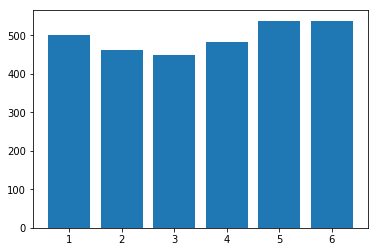

In [30]:
# Creating barplot for fan views
plt.bar(range(1,7), fans_seen)

<BarContainer object of 6 artists>

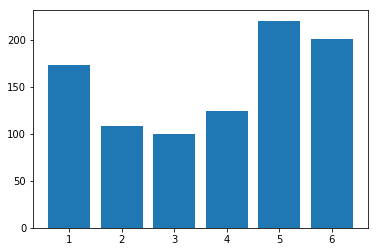

In [31]:
# Creating barplot for non-fan views
plt.bar(range(1,7), non_fans_seen)

For both groups, the 5th movie seems to be the most viewed. This, again, could explain why it was the highest ranked among both groups.

Next, we can explore whether respondents who are fans of Star Trek only have different opinions compared to respondents who are fans of Star Wars only.

## Finding the Highest Ranked Movie Among Star Wars-Only Fans and Star Trek-Only Fans

We can first identify how many Star Trek fans there were among the respondents.

In [32]:
# Counting number of Star Trek fans
star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts(dropna=False)

False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [33]:
427/(118+641+427)

0.3600337268128162

There are around one third of the total respondents which are Star Trek fans. Next, we can count how many of these fans were not Star Wars fans.

In [34]:
# Counting number of Star Trek fans that are not Star Wars fans
((star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == True) & (star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False)).sum()

45

We notice that most of the Star Trek fans are also Star Wars fans. We can begin our analysis with Star Trek-only fans and Star Wars-only fans.

In [35]:
# Separating Star Trek fans from Star Wars fans
star_trek_fans = star_wars[(star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == True) & (star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False)]

star_wars_fans = star_wars[(star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == False) & (star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True)]

We can now check how each group rated the Star Wars movies.

In [36]:
# Calculating Star Trek fan rankings
trek_ranking = star_trek_fans[star_trek_fans.columns[9:15]].mean()

# Exploring fan rankings
trek_ranking

rank_1    3.044444
rank_2    3.644444
rank_3    4.200000
rank_4    3.844444
rank_5    2.733333
rank_6    3.533333
dtype: float64

In [37]:
# Calculating Star Wars fan rankings
star_ranking = star_wars_fans[star_wars_fans.columns[9:15]].mean()

# Exploring non-fan rankings
star_ranking

rank_1    4.262857
rank_2    4.371429
rank_3    4.400000
rank_4    2.742857
rank_5    2.280000
rank_6    2.942857
dtype: float64

<BarContainer object of 6 artists>

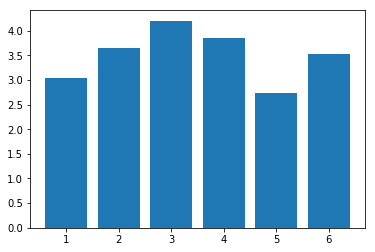

In [38]:
# Creating barplot of Star Trek fan rankings
plt.bar(range(1,7), trek_ranking)

<BarContainer object of 6 artists>

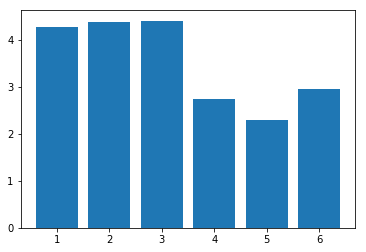

In [39]:
# Creating barplot of Star Wars fan rankings
plt.bar(range(1,7), star_ranking)

The results are similar to the ones found previously–the 5th movie is still the most popular among both groups, however most Star Trek-only fans seem to have also ranked the 1st movie as the best of all. On the other hand, Star Wars only fans ranked the last 3 movies as best. We can now check which movie was more viewed by each of these groups.

## Finding the Most Viewed Movie Among Star Wars-Only Fans and Star Trek-Only Fans

In [40]:
# Calculating Star Trek-only views
trek_seen = star_trek_fans[star_trek_fans.columns[3:9]].sum()

trek_seen

seen_1    31
seen_2    23
seen_3    18
seen_4    25
seen_5    37
seen_6    35
dtype: int64

In [41]:
# Calculating Star Wars-only views
star_seen = star_wars_fans[star_wars_fans.columns[3:9]].sum()

star_seen

seen_1    160
seen_2    143
seen_3    139
seen_4    159
seen_5    171
seen_6    169
dtype: int64

We can now create a visualization.

<BarContainer object of 6 artists>

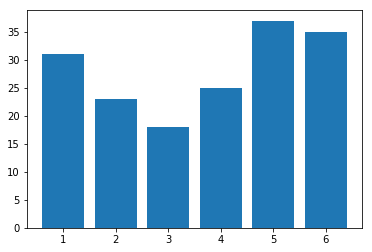

In [42]:
# Creating barplot for Star Trek-only views
plt.bar(range(1,7), trek_seen)

<BarContainer object of 6 artists>

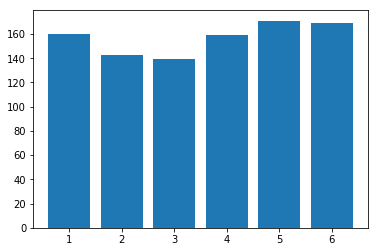

In [43]:
# Creating barplot for Star Wars-only views
plt.bar(range(1,7), star_seen)

For both groups, the 5th movie seems to be the most viewed. This, again, could explain why it was the highest ranked among both groups.

## Conclusion

The goal of this project was to clean, explore the and analyze the data from respondents on the Star Wars movie franchise. We reached to the conclusion that the 5th movie, Star Wars: Episode V The Empire Strikes Back ranked the highest within the respondents. It also happened to be the most viewed among the respondents, which could explain why it was the highest ranked. Furthermore, we noticed that within subgroups of respondents, including males, females, Star Wars fans, Star Trek fans, Star Wars-only fans and Star Trek-only fans, these results were the same.